### **Решение задачи регрессии** 

Ранее мы исследовали датасет по успеваемости студентов. Сейчас мы хотим попытаться предсказать оценки студентов с различными параметрами.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

Нормализация данных

In [ ]:
GENDER = 'gender'
RACE = 'race/ethnicity'
PLE = 'parental level of education'
LUNCH = 'lunch'
PREPAR = 'test preparation course'
MATH = 'math score'
READ = 'reading score'
WRITE = 'writing score'

In [ ]:
races = list(df[RACE].unique())
races.sort()
races

['group A', 'group B', 'group C', 'group D', 'group E']

In [ ]:
def norm_gender(gender: str) -> int:
  if gender == 'male':
    return 0
  else:
    return 1

races = list(df[RACE].unique())
races.sort()

def norm_race(race: str) -> int:
  return races.index(race)

ples = list(df[PLE].unique())
ples.sort()
def norm_ple(ple: str) -> int:
  
  return ples.index(ple)

def norm_lunch(lunch: str) -> int:
  if lunch == 'standart':
    return 0
  else:
    return 1

def norm_preparation(is_prepared: str) -> int:
  if is_prepared == 'none':
    return 0
  else:
    return 1

In [ ]:
df_norm = df.copy()

df_norm[GENDER] = df_norm[GENDER].apply(norm_gender)
df_norm[RACE] = df_norm[RACE].apply(norm_race)
df_norm[PLE] = df_norm[PLE].apply(norm_ple)
df_norm[LUNCH] = df_norm[LUNCH].apply(norm_lunch)
df_norm[PREPAR] = df_norm[PREPAR].apply(norm_preparation)

df_norm.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,1,1,0,72,72,74
1,1,2,4,1,1,69,90,88
2,1,1,3,1,0,90,95,93
3,0,0,0,1,0,47,57,44
4,0,2,4,1,0,76,78,75


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

(trainData, testData, trainAns, testAns) = train_test_split(
    df_norm[[GENDER, RACE, PLE, LUNCH, PREPAR]].to_numpy(),
    df_norm[[MATH, READ, WRITE]].to_numpy(),
    train_size=0.7)

In [ ]:
model = LinearRegression().fit(trainData, trainAns)
model.score(trainData, trainAns)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.15604485344859867

In [ ]:
pred = model.predict(testData)

print(model.score(testData, testAns))

for i in range(5):
  round_pred = [round(elem) for elem in pred[i]]
  print("TEST DATA", testData[i], "ANS", round_pred, "ACT", testAns[i])

0.15472284482169119
TEST DATA [1 1 0 1 0] ANS [61, 70, 69] ACT [71 83 78]
TEST DATA [1 2 0 1 0] ANS [64, 72, 71] ACT [69 80 71]
TEST DATA [1 4 2 1 0] ANS [68, 74, 73] ACT [99 93 90]
TEST DATA [1 3 5 1 0] ANS [64, 71, 70] ACT [73 84 85]
TEST DATA [1 2 5 1 1] ANS [67, 76, 78] ACT [65 76 75]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


Видно, что коэффициент детерминации достаточно мал, что означает, что мы можем предсказывать результат лишь очень приблизительно

In [ ]:
mean_squared_error(testAns, model.predict(testData), squared=False) # MSE

14.526800407137248

Погрешность 14.5 баллов - это достаточно много. Убеждаемся в относительной бесполезности модели. Можно попробовать избавиться от части столбцов и обучить другую модель. 

Добавим в модель данные о других оценках

In [ ]:
(trainData2, testData2, trainAns2, testAns2) = train_test_split(
    df_norm[[GENDER, RACE, PLE, LUNCH, PREPAR, MATH, READ]].to_numpy(),
    df_norm[[WRITE]].to_numpy(),
    train_size=0.7)

model2 = LinearRegression().fit(trainData2, trainAns2)
model2.score(trainData2, trainAns2)

0.9435767981339643

In [ ]:
pred = model2.predict(testData2)

for i in range(20):
  round_pred = [round(elem) for elem in pred[i]]
  print("TEST DATA", testData[i], "ANS", round_pred, "ACT", testAns[i][2])

TEST DATA [1 1 0 1 0] ANS [83] ACT 78
TEST DATA [1 2 0 1 0] ANS [81] ACT 71
TEST DATA [1 4 2 1 0] ANS [86] ACT 90
TEST DATA [1 3 5 1 0] ANS [76] ACT 85
TEST DATA [1 2 5 1 1] ANS [80] ACT 75
TEST DATA [1 3 2 1 0] ANS [70] ACT 55
TEST DATA [0 2 4 1 0] ANS [85] ACT 58
TEST DATA [0 2 4 1 0] ANS [65] ACT 73
TEST DATA [0 2 4 1 0] ANS [68] ACT 62
TEST DATA [1 1 5 1 1] ANS [72] ACT 78
TEST DATA [1 1 1 1 0] ANS [71] ACT 69
TEST DATA [1 3 1 1 0] ANS [63] ACT 73
TEST DATA [1 0 0 1 0] ANS [77] ACT 76
TEST DATA [0 2 0 1 0] ANS [32] ACT 71
TEST DATA [1 1 4 1 0] ANS [68] ACT 55
TEST DATA [0 0 0 1 1] ANS [72] ACT 82
TEST DATA [0 3 1 1 0] ANS [69] ACT 74
TEST DATA [0 3 1 1 0] ANS [59] ACT 83
TEST DATA [0 4 0 1 0] ANS [77] ACT 82
TEST DATA [1 2 0 1 1] ANS [93] ACT 93


In [ ]:
mean_squared_error(testAns2, model2.predict(testData2), squared=False) # MSE

3.9813127576718337

Результат оказался гораздо лучше. Можно предсказывать данные об оценках по одному предмету на основе данных о других оценках и личных данных студентов

### **Обучение методом k-NN**

Попробуем предсказать данные о студенте на основе его баллов

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df_norm.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,1,1,0,72,72,74
1,1,2,4,1,1,69,90,88
2,1,1,3,1,0,90,95,93
3,0,0,0,1,0,47,57,44
4,0,2,4,1,0,76,78,75


Попробуем сначала предсказать пол студента на основе данных

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import * 
from sklearn.metrics import plot_confusion_matrix

In [ ]:
(trainData, testData, trainAns, testAns) = train_test_split(
    df_norm[[MATH, READ, WRITE]].to_numpy(),
    df_norm[[GENDER]].to_numpy(),
    train_size=0.7)

In [ ]:
kNN_1 = KNeighborsClassifier(n_neighbors=1)
kNN_3 = KNeighborsClassifier(n_neighbors=3)
kNN_5 = KNeighborsClassifier(n_neighbors=5)
kNN_7 = KNeighborsClassifier(n_neighbors=7)

In [ ]:
kNN_1.fit(trainData, trainAns)
print(classification_report(testAns, kNN_1.predict(testData)))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       144
           1       0.79      0.83      0.81       156

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
kNN_3.fit(trainData, trainAns)
print(classification_report(testAns, kNN_3.predict(testData)))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       144
           1       0.82      0.89      0.86       156

    accuracy                           0.84       300
   macro avg       0.85      0.84      0.84       300
weighted avg       0.85      0.84      0.84       300



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
kNN_5.fit(trainData, trainAns)
print(classification_report(testAns, kNN_5.predict(testData)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       144
           1       0.81      0.90      0.85       156

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
kNN_7.fit(trainData, trainAns)
print(classification_report(testAns, kNN_7.predict(testData)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       144
           1       0.82      0.87      0.84       156

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Самый хороший результат дали классификаторы с 3 и 5 соседями. Проверим, вдруг повезет, и с 4 соседями будет наиболее оптимальный вариант

In [ ]:
kNN_4 = KNeighborsClassifier(n_neighbors=4)
kNN_4.fit(trainData, trainAns)
print(classification_report(testAns, kNN_4.predict(testData)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       144
           1       0.86      0.84      0.85       156

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Тоже хороший результат, но я бы ориентировался на классификатор с 3 соседями

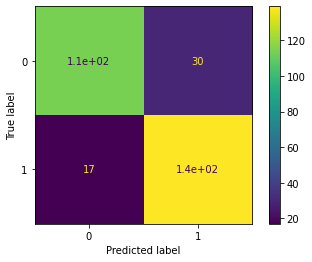

In [ ]:
plot_confusion_matrix(kNN_3, testData, testAns)

Попробуем с помощью того же kNN-классификатора предсказать уровень образования родителей (хотя и помним, что он не очень сильно кореллировал с результатами)

In [ ]:
kNN_1_ple = KNeighborsClassifier(n_neighbors=1)
kNN_3_ple = KNeighborsClassifier(n_neighbors=3)
kNN_5_ple = KNeighborsClassifier(n_neighbors=5)
kNN_7_ple = KNeighborsClassifier(n_neighbors=7)

In [ ]:
(trainData, testData, trainAns, testAns) = train_test_split(
    df_norm[[MATH, READ, WRITE]].to_numpy(),
    df_norm[[PLE]].to_numpy(),
    train_size=0.7)

In [ ]:
kNN_1_ple.fit(trainData, trainAns)
print(classification_report(testAns, kNN_1_ple.predict(testData)))

              precision    recall  f1-score   support

           0       0.31      0.33      0.32        67
           1       0.06      0.05      0.05        37
           2       0.21      0.21      0.21        57
           3       0.11      0.11      0.11        19
           4       0.25      0.25      0.25        69
           5       0.16      0.16      0.16        51

    accuracy                           0.21       300
   macro avg       0.18      0.18      0.18       300
weighted avg       0.21      0.21      0.21       300



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
kNN_3_ple.fit(trainData, trainAns)
print(classification_report(testAns, kNN_3_ple.predict(testData)))

              precision    recall  f1-score   support

           0       0.23      0.45      0.31        67
           1       0.15      0.16      0.16        37
           2       0.23      0.21      0.22        57
           3       0.18      0.11      0.13        19
           4       0.28      0.16      0.20        69
           5       0.20      0.12      0.15        51

    accuracy                           0.22       300
   macro avg       0.21      0.20      0.19       300
weighted avg       0.23      0.22      0.21       300



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
kNN_5_ple.fit(trainData, trainAns)
print(classification_report(testAns, kNN_5_ple.predict(testData)))

              precision    recall  f1-score   support

           0       0.23      0.40      0.29        67
           1       0.25      0.14      0.18        37
           2       0.24      0.25      0.24        57
           3       0.18      0.11      0.13        19
           4       0.24      0.20      0.22        69
           5       0.15      0.10      0.12        51

    accuracy                           0.22       300
   macro avg       0.21      0.20      0.20       300
weighted avg       0.22      0.22      0.21       300



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Результат уже хуже

In [ ]:
kNN_7_ple.fit(trainData, trainAns)
print(classification_report(testAns, kNN_7_ple.predict(testData)))

              precision    recall  f1-score   support

           0       0.22      0.40      0.28        67
           1       0.14      0.08      0.10        37
           2       0.19      0.21      0.20        57
           3       0.00      0.00      0.00        19
           4       0.34      0.30      0.32        69
           5       0.15      0.08      0.10        51

    accuracy                           0.22       300
   macro avg       0.18      0.18      0.17       300
weighted avg       0.21      0.22      0.21       300



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Лучше, чем с классификатором, который работает с тремя соседями, мы не увидим результат.

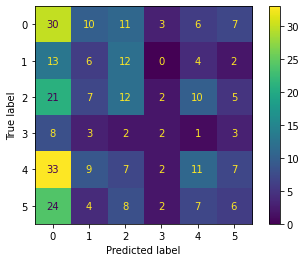

In [ ]:
plot_confusion_matrix(kNN_3_ple, testData, testAns)